In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import json
import gzip

In [2]:
def parse(path):
    g=gzip.open(path,'rb')
    for l in g:
        yield eval(l)
def getDF(path):
    i=0
    df={}
    for d in parse(path):
        df[i]=d
        i+=1
    return pd.DataFrame.from_dict(df,orient='index')
df=getDF("reviews_Digital_Music_5 (1).json.gz")

In [3]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,991526400,"06 3, 2001"
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,1058140800,"07 14, 2003"
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,957312000,"05 3, 2000"
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,1200528000,"01 17, 2008"


In [4]:
df=df.drop(["reviewerName"],axis=1)
df=df.rename(columns={"asin":"productID","overall":"rating","unixReviewTime":"unixTime"})
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,unixTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,991526400,"06 3, 2001"
2,A38IRL0X2T4DPF,5555991584,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,1058140800,"07 14, 2003"
3,A22IK3I6U76GX0,5555991584,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,957312000,"05 3, 2000"
4,A1AISPOIIHTHXX,5555991584,"[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,1200528000,"01 17, 2008"


In [5]:
df["reviewTime"]=pd.to_datetime(df["reviewTime"])

In [6]:
df=df.drop(["unixTime"],axis=1)
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,2006-09-12
1,AZPWAXJG9OJXV,5555991584,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,2001-06-03
2,A38IRL0X2T4DPF,5555991584,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,2003-07-14
3,A22IK3I6U76GX0,5555991584,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,2000-05-03
4,A1AISPOIIHTHXX,5555991584,"[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,2008-01-17


In [7]:
df["sentiment"]=df['rating']
df["sentiment"]=df["sentiment"].replace({1:"extreme_negative",2:"negative",3:"neutral",4:"positive",5:"extreme_positive"})
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,sentiment
0,A3EBHHCZO6V2A4,5555991584,"[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,2006-09-12,extreme_positive
1,AZPWAXJG9OJXV,5555991584,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,2001-06-03,extreme_positive
2,A38IRL0X2T4DPF,5555991584,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,2003-07-14,extreme_positive
3,A22IK3I6U76GX0,5555991584,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,2000-05-03,extreme_positive
4,A1AISPOIIHTHXX,5555991584,"[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,2008-01-17,positive


In [8]:
df.size

517648

In [9]:
df.shape

(64706, 8)

In [10]:
df.columns

Index(['reviewerID', 'productID', 'helpful', 'reviewText', 'rating', 'summary',
       'reviewTime', 'sentiment'],
      dtype='object')

In [11]:
df.dtypes

reviewerID            object
productID             object
helpful               object
reviewText            object
rating               float64
summary               object
reviewTime    datetime64[ns]
sentiment             object
dtype: object

In [12]:
df.isnull().sum()

reviewerID    0
productID     0
helpful       0
reviewText    0
rating        0
summary       0
reviewTime    0
sentiment     0
dtype: int64

In [13]:
df.describe()

,rating
count,64706.000000
mean,4.222514
std,1.086081
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Data Visualization

In [14]:
import warnings
warnings.filterwarnings('ignore')

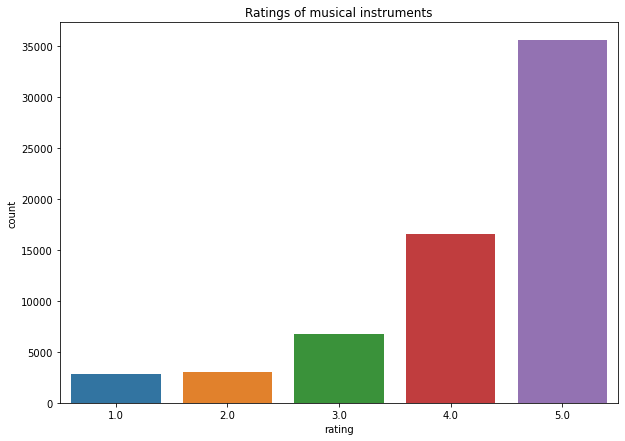

In [15]:
plt.figure(figsize=(10,7))
sb.countplot(df['rating'])
plt.title('Ratings of musical instruments')
plt.xlabel('rating')
plt.show()

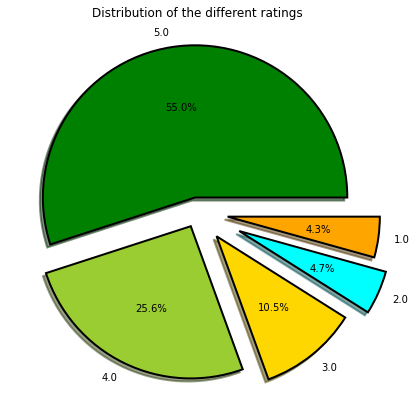

In [16]:
fig = plt.figure(figsize=(7,7))
colors = ("green","yellowgreen","gold","cyan","orange")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['rating'].value_counts()
explode = (0.1,0.1,0.2,0.3,0.2)
tags.plot(kind='pie', autopct='%1.1f%%',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of the different ratings')
plt.show()

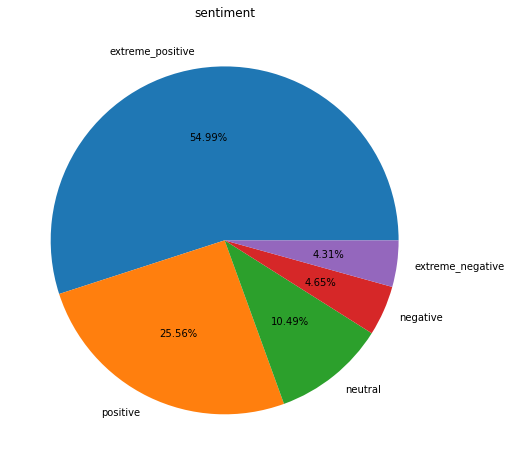

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set_title("sentiment")
percentage = df['sentiment'].value_counts()
labels = list(df['sentiment'].value_counts().index)
plt.pie(percentage, labels = labels, autopct = '%0.2f%%')
plt.show()

In [18]:
df["reviewyear"]=df['reviewTime'].dt.year
df.head()

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,sentiment,reviewyear
0,A3EBHHCZO6V2A4,5555991584,"[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,2006-09-12,extreme_positive,2006
1,AZPWAXJG9OJXV,5555991584,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,2001-06-03,extreme_positive,2001
2,A38IRL0X2T4DPF,5555991584,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,2003-07-14,extreme_positive,2003
3,A22IK3I6U76GX0,5555991584,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,2000-05-03,extreme_positive,2000
4,A1AISPOIIHTHXX,5555991584,"[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,2008-01-17,positive,2008


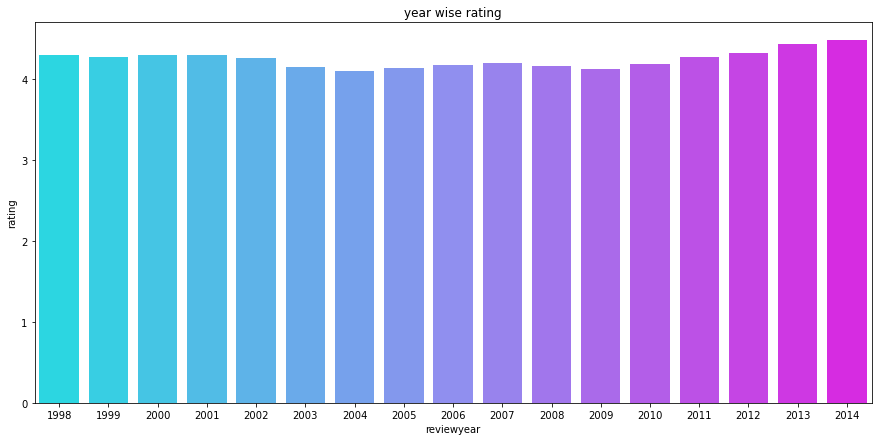

In [19]:
plt.figure(figsize = (15,7))
sb.barplot(data = df, x = 'reviewyear', y = 'rating', palette = 'cool', ci = False)
plt.title("year wise rating")
plt.show()

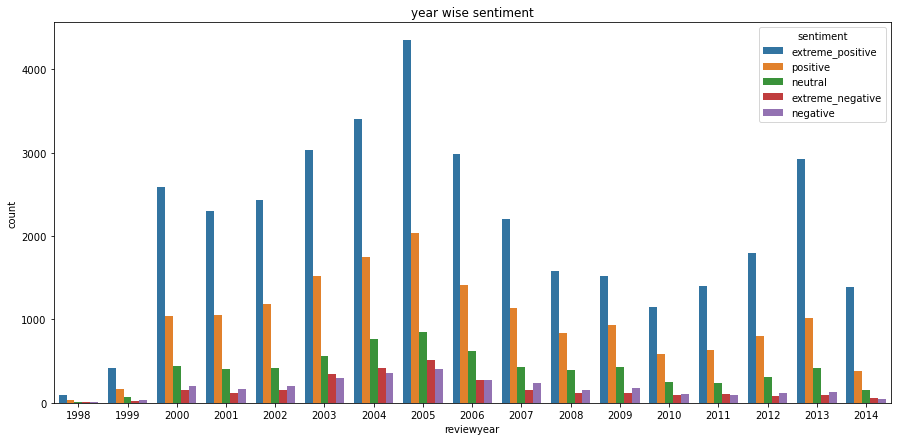

In [20]:
plt.figure(figsize=(15,7))
sb.countplot(df['reviewyear'],hue=df['sentiment'])
plt.title('year wise sentiment')
plt.show()

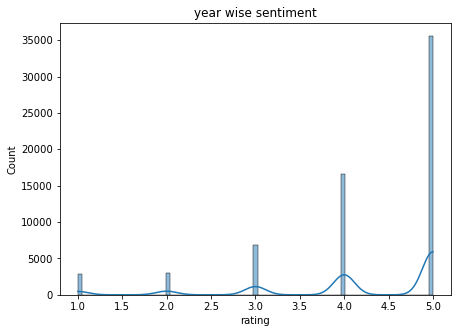

In [21]:
plt.figure(figsize=(7,5))
sb.histplot(df['rating'],kde=True)
plt.title('year wise sentiment')
plt.show()

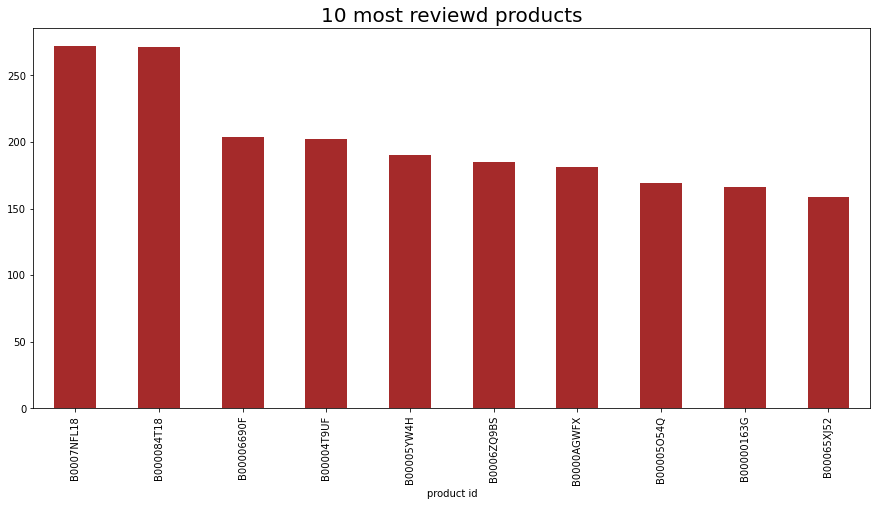

In [22]:
df['productID'].value_counts()[:10].plot.bar(figsize=(15,7),color='brown')
plt.title("10 most reviewd products",fontsize=20)
plt.xlabel('product id')
plt.show()

<Figure size 1080x432 with 0 Axes>

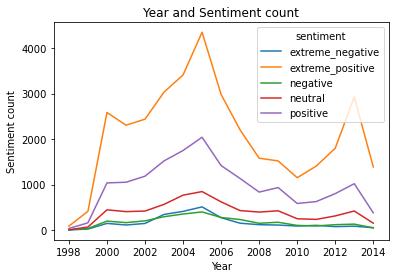

In [23]:
plt.figure(figsize=(15,6))
df.groupby(['reviewyear','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

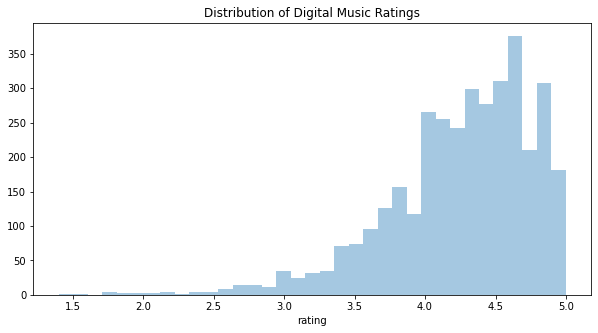

In [136]:
plt.figure(figsize = [10,5])
sb.distplot(df_product_rating['rating'], bins = 35, kde = False)
plt.title("Distribution of Digital Music Ratings");

In [24]:
import re

def clean_text(text):
    text=re.sub("[^0-9A-Za-z\-]+"," ",text)#remoce special characters
    text=re.sub("(?<!\w)\d+","",text)  #if number is written after a word remove it
    text=re.sub("-(?!\w)","",text)  #remove hyphen except for words which need hyphen tik-tok 
    text=" ".join(text.split())
    text=text.lower()
    return text

In [25]:
df['reviewText']=df['reviewText'].apply(clean_text)
df['reviewText'][2]

'i never thought enya would reach the sublime heights of evacuee or marble halls from shepherd moons the celts watermark and day were all pleasant and admirable throughout but are less ambitious both lyrically and musically but hope has a place from memory reaches those heights and beyond it is enya at her most inspirational and comforting i m actually glad that this song didn t get overexposed the way only time did it makes it that much more special to all who own this album'

In [26]:
df['rating'].value_counts()

5.0    35580
4.0    16536
3.0     6789
2.0     3010
1.0     2791
Name: rating, dtype: int64

In [27]:
df['sentiment'].value_counts()

extreme_positive    35580
positive            16536
neutral              6789
negative             3010
extreme_negative     2791
Name: sentiment, dtype: int64

In [28]:
df['reviewyear'].value_counts()

2005    8149
2004    6696
2003    5763
2006    5575
2013    4589
2000    4418
2002    4397
2007    4153
2001    4047
2009    3170
2012    3115
2008    3089
2011    2471
2010    2187
2014    2029
1999     709
1998     149
Name: reviewyear, dtype: int64

In [29]:
df.groupby(['reviewyear','sentiment']).size()

reviewyear  sentiment       
1998        extreme_negative       6
            extreme_positive      89
            negative               9
            neutral                8
            positive              37
                                ... 
2014        extreme_negative      54
            extreme_positive    1389
            negative              51
            neutral              154
            positive             381
Length: 85, dtype: int64

In [30]:
df['productID'].unique()

array(['5555991584', 'B0000000ZW', 'B00000016T', ..., 'B00JTHVWO8',
       'B00JYKU6BK', 'B00KILDVEI'], dtype=object)

In [31]:
product_rating={}
for row,product in enumerate(df['productID'].unique()):
    product_temp=df[df["productID"]==product]
    product_rating[product]=product_temp['rating'].mean()

In [32]:
df_product_rating=pd.DataFrame(list(product_rating.items()),columns=['productId',"rating"])
df_product_rating.head()

,productId,rating
0,5555991584,4.739130
1,B0000000ZW,4.133333
2,B00000016T,4.851064
3,B00000016W,4.629630
4,B00000017R,4.650000


In [33]:
df_product_rating[df_product_rating['rating']==df_product_rating['rating'].min()]

,productId,rating
2951,B001UXJQLA,1.4


In [34]:
d=df[df['productID']=='B001UXJQLA']
d

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,sentiment,reviewyear
57657,A1IYUECSCVU7ZT,B001UXJQLA,"[0, 1]",i think maybe he has lost the touch since ever...,2.0,"Mike Jones Got Me Saying Tiec Tocc , Gucci Mane",2009-05-31,negative,2009
57658,A1D6HK21UH1163,B001UXJQLA,"[0, 0]",booooooooooooooo i was hopeing to hear a cd wi...,2.0,so sad,2009-05-13,negative,2009
57659,AAM4PQ0VMEQLL,B001UXJQLA,"[0, 2]",what much can i say mike jones mike jones mike...,1.0,Mike Jones please go away!,2009-10-06,extreme_negative,2009
57660,AEK56P56T0YN4,B001UXJQLA,"[1, 2]",i am sure you have all heard his annoying catc...,1.0,Who? Mike Jones!,2009-05-01,extreme_negative,2009
57661,A1W16J9R4DOBEC,B001UXJQLA,"[0, 1]",a hasbeen rapper wack beats trying to hard to ...,1.0,who was mike jones,2010-10-16,extreme_negative,2010


In [35]:
d['reviewText']

57657    i think maybe he has lost the touch since ever...
57658    booooooooooooooo i was hopeing to hear a cd wi...
57659    what much can i say mike jones mike jones mike...
57660    i am sure you have all heard his annoying catc...
57661    a hasbeen rapper wack beats trying to hard to ...
Name: reviewText, dtype: object

In [36]:
d['reviewText'].iloc[0]

'i think maybe he has lost the touch since everybody has his phone numberis it worth the money no it s only one good song and thats the title trackcheck out birthday sex by jermemih and frozen by tiec toccat least you can play those song s all dayand these new artist are switching the game up'

In [37]:
d['reviewText'].iloc[1]

'booooooooooooooo i was hopeing to hear a cd with no mike jones we know your name i gave it stars for some decent beats and hooks but he is trash if your brain is small as a pea you may be able to withstand this voice of wackness'

In [38]:
d['reviewText'].iloc[2]

'what much can i say mike jones mike jones mike jones ahhh you suck he s another one hit wonder that needs to retire over of southern wrappers can t call it hip hop or rap better yet crunk garbage music is what s killing mainstream hip hop today if it still exist'

In [39]:
d['reviewText'].iloc[3]

'i am sure you have all heard his annoying catchphrase and sadly mike jones is back no one else has reviewed this album and i am not surprised because this album is garbage his last album who is mike jones was a bad album but his street single still tippin was the only reason his album sold now fast forward to the voice and you get a album that gives many people a reason to say hip hop is dead this album is just stereotypical hip hop spend money and having sex with women mike jones doesn t even try to push his game up his lyrics are horrible the funniest thing is that i saw a interview of mike jones and they were asking his opinion on the current state of hip hop and to me that was the most ironic thing are you serious you are asking mike jones not nas jay-z eminem or saigon this album doesn t have any songs that would really want to make you buy this album if i had to choose a favorite song i guess cuddly buddy but really im being too nice in the end if you are a die hard mike jones f

In [40]:
d['reviewText'].iloc[4]

'a hasbeen rapper wack beats trying to hard to be mainstream his career is through'

In [41]:
len(df['reviewText'])

64706

In [42]:
from textblob import TextBlob

In [43]:
blob=TextBlob(df['reviewText'][1])
blob.sentiment

Sentiment(polarity=0.2514792899408284, subjectivity=0.5072978303747535)

In [44]:
polarity_list,subjectivity_list=[],[]
for i in range(len(df['reviewText'])):
    blob=TextBlob(df['reviewText'][i])
    polarity_list.append(blob.sentiment.polarity)
    subjectivity_list.append(blob.sentiment.subjectivity)

In [45]:
print(polarity_list[:5])
print(subjectivity_list[:5])

[0.1942550505050505, 0.2514792899408284, 0.3430735930735931, 0.4539393939393939, 0.3468406756642052]
[0.5097853535353535, 0.5072978303747535, 0.6686147186147186, 0.4592929292929293, 0.5872782446311857]


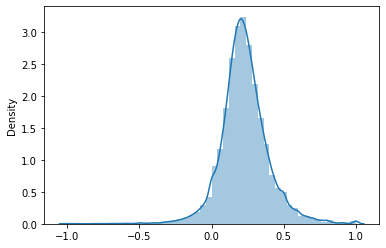

In [46]:
sb.distplot(polarity_list)
plt.show()

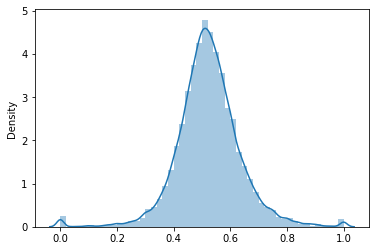

In [47]:
sb.distplot(subjectivity_list)
plt.show()

In [48]:
from scipy import stats
stats.describe(polarity_list)

DescribeResult(nobs=64706, minmax=(-1.0, 1.0), mean=0.22790487877199786, variance=0.027651004440316165, skewness=0.16078791341606136, kurtosis=3.542280524276414)

In [49]:
stats.describe(subjectivity_list)

DescribeResult(nobs=64706, minmax=(0.0, 1.0), mean=0.5228624365707223, variance=0.012900974204873255, skewness=-0.10756872808419966, kurtosis=3.4351787422465936)

##### highly positive reviews

In [50]:
c=0
for i in range(len(polarity_list)):
    if(c>10):break
    if(polarity_list[i]>.9 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

man this is cd is fire man fo reel this is his best work in my opinion u can pop this in and play it thru e-fo day drops heat on this one id give it stars if i could go buy this now goddammit the best songs are all of em 

the best album from keith murray all the songs have keiths signature lyricism and def squad beats to keep your head knockin don t sleep keith s a genuis with the words 

everytime i hear selena i think i might cry this cd is perfect rip selena 

all hail this paris duo they lost their way after this but homeworkis izmo the best dance album ever underworld and homework is all u need 

the greatest rap album ever by the greatest rap artists ever ranks up there with the bst in music history r i p 

this was the best album ever recorded marvin was way ahead of his time the lyrics the music the harmonies etc way ahead of it s time 

this is definitly stevie at his best but there are some filler like the instrumentals but the rest are wonderfull i recommend it 

the box is

##### highly negative reviws

In [51]:
c=0
for i in range(len(polarity_list)):
    if(c>10):break
    if(polarity_list[i]<.9 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

it s hard to believe memory of trees came out years ago it has held up well over the passage of time it s enya s last great album before the new age pop of amarantine and day without rain back in enya still had her creative spark her own voice i agree with the reviewer who said that this is her saddest album it is melancholy bittersweet from the opening title song memory of trees is elegaic majestic pax deorum sounds like it is from a requiem mass it is a dark threnody unlike the reviewer who said that this has a disconcerting blend of spirituality sensuality i don t find it disconcerting at all anywhere is is a hopeful song looking to possibilities hope has a place is about love but it is up to the listener to decide if it is romantic platonic etc i ve always had a soft spot for this song on my way home is a triumphant ending about return this is truly a masterpiece of new age music a must for any enya fan 

a clasically-styled and introverted album memory of trees is a masterpiece of

##### objective reviews

In [52]:
c=0
for i in range(len(subjectivity_list)):
    if(c>10):break
    if(subjectivity_list[i]>.9 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

if i could rate this album stars i would there is no words to express the fact that this cd is slamming very hot very hot 

krs one s krs one is one of my favorites albums by krs also my favorite cd in my collection because i feel this album is deeper then anything i ve heard in my life im a huge huge fan of krs works and his lirycs and his production is just amazing support krs one he s the truth 

one day has always been a favorite of mine from ugk i had to replace this cd in my collection 

i can t stop listening to these songs especially and help me 

this is one of my favorite jazz cds of all time the beauty of the opening lines of autumn leaves will just knock you out guaranteed miles davis is unbelievably cool on this recording and cannonball s alto solos are stunning sam jones and art blakey provide a powerful bottom to all the cuts and the piano of hank jones is understated and tastefull what an incredible performance every cut is a gem deserves stars 

everytime i hear selena

##### subjective reviews

In [53]:
c=0
for i in range(len(subjectivity_list)):
    if(c>10):break
    if(subjectivity_list[i]<.1 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

billy ocean delivered here and showed the world that he was out there and already performing the stars aligned for this offering and what a powerhouse my album for my time in africa in the s 

you can trust me i ve heard all their music pimp c rip and bun b who are you if you haven t heard of these mc s and this album 

the man is prince teddy pendergrass in one the difinitive r amp b album of the s is still a banger to this day 

g-funk from the bay e-fizze rep that bay life the beats are bangin the lyrics are dope they slam on my jbl s makin heads turn 

delivery b lyrics a production astyle a consistensy a overall a 

just read this morning that paris was shot and killed came here to check out the artist because i d never heard of him what a shame this is a must have for the collection 

very generic no soul no substance no life no emotion from the artist no creativity no nothing 

everytime i hear this music it always turns me on the smoking performance of the menbers of brand x is

##### neutral reviews

In [54]:
c=0
for i in range(len(polarity_list)):
    if(c>10):break
    if(polarity_list[i]==0 and c<10):
        print(df['reviewText'][i],"\n")
        c+=1

this time in different mixes authentitcity in the mono version and a stereo version for hi-fi freaks i m over the moon about this one 

too short is the ultimate pimp if you like this album check out smoke sessions vol from his homie devin the dude another stars 

too short is teh ultimate pimp if you liek this album check out smoke sessions vol from his homie devin the dude another stars 

billy ocean delivered here and showed the world that he was out there and already performing the stars aligned for this offering and what a powerhouse my album for my time in africa in the s 

this came out in the midst of a lot of negativity in hip hop which has since overtaken the genre krs-one did a good job here in denouncing racism both inside and outside of the black community dealing with issues of identity the homeless and ya strugglin-note the subtle swipe at michael jackson in the latter and an all-star jam with the bdp crew d-nice miss melody sister harmony etc some excerpts from stokely 

In [55]:
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer

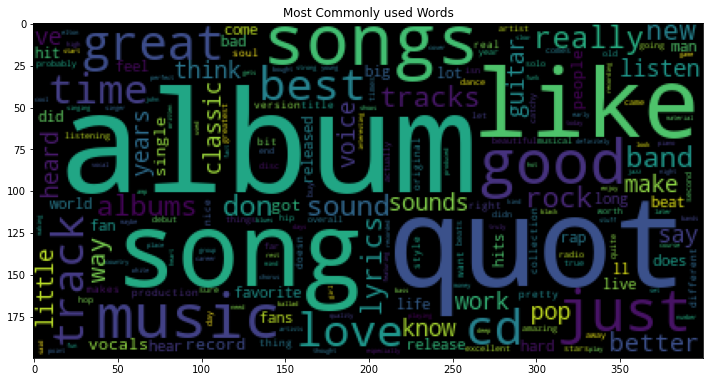

In [57]:
cnv = CountVectorizer(stop_words = 'english')
wrds = cnv.fit_transform(df["reviewText"])
sum_wrds = wrds.sum(axis = 0)

wrds_freq = [(wrd, sum_wrds[0, idx]) for wrd, idx in cnv.vocabulary_.items()]
wrds_freq = sorted(wrds_freq, key = lambda x : x[1], reverse = True)
freq = pd.DataFrame(wrds_freq, columns = ['word', 'frequency'])

wrdcloud = WordCloud().generate_from_frequencies(dict(wrds_freq))

plt.figure(figsize = (12,8))
plt.title("Most Commonly used Words")
plt.imshow(wrdcloud)
plt.show()

In [58]:
# separating all records into a differnet variable to generate wordcloud based on category
neu = df[df["sentiment"] == "neutral"]["reviewText"]
neg = df[df["sentiment"] == "negative"]["reviewText"]
pos = df[df["sentiment"] == "positive"]["reviewText"]
exneg = df[df["sentiment"] == "extreme_negative"]["reviewText"]
expos = df[df["sentiment"] == "extreme_positive"]["reviewText"]

In [59]:
stpwrds = set(STOPWORDS)
def word_cloud(data, title):
    wordcld = WordCloud(
    background_color = "black",
    max_font_size = 40,
    max_words = 200,
    stopwords = stpwrds,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.25)
    plt.imshow(wordcld)
plt.show()

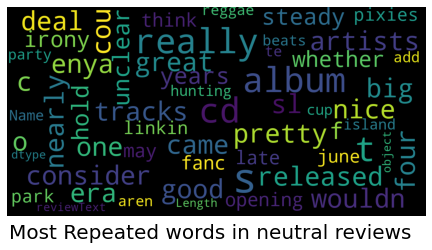

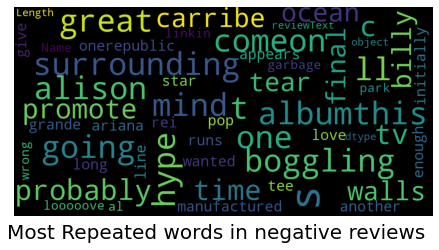

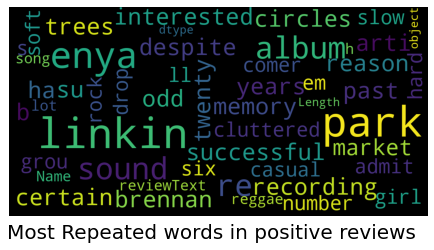

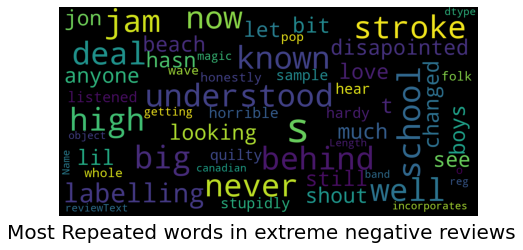

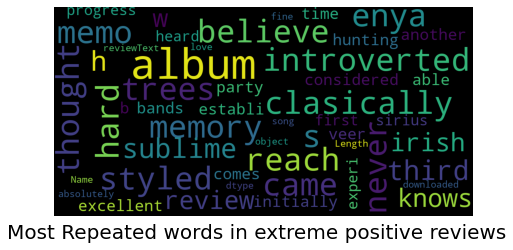

In [60]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(neg, "Most Repeated words in negative reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(exneg, "Most Repeated words in extreme negative reviews")
word_cloud(expos, "Most Repeated words in extreme positive reviews")

In [61]:
df["target"] = df["sentiment"]
df["target"] = df["target"].replace({"extreme_negative":"0","negative":"0","neutral":"0","positive":"1","extreme_positive":"1"})
df.head(2)

,reviewerID,productID,helpful,reviewText,rating,summary,reviewTime,sentiment,reviewyear,target
0,A3EBHHCZO6V2A4,5555991584,"[3, 3]",it s hard to believe memory of trees came out ...,5.0,Enya's last great album,2006-09-12,extreme_positive,2006,1
1,AZPWAXJG9OJXV,5555991584,"[0, 0]",a clasically-styled and introverted album memo...,5.0,Enya at her most elegant,2001-06-03,extreme_positive,2001,1


In [62]:
x_train,x_test,y_train,y_test=train_test_split(df['reviewText'],df['target'],test_size=0.20,random_state=42)

In [63]:
vectorizer=TfidfVectorizer(
    sublinear_tf=True,
    max_df=0.5,
    min_df=1,
    stop_words=stopwords.words("english"),
    use_idf=True
)

In [64]:
x_train=vectorizer.fit_transform(x_train)
print('x_train n_samples:%d,n_features:%d' %x_train.shape)

x_train n_samples:51764,n_features:99883


In [65]:
x_test=vectorizer.transform(x_test)
print('x_test n_samples:%d,n_features:%d' %x_test.shape)

x_test n_samples:12942,n_features:99883


In [66]:
cv=TfidfVectorizer(max_features=2500)
x=cv.fit_transform(df['reviewText'])

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [68]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [69]:
print(pred[:10])
print(y_test[:10])

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
22294    1
15633    1
14636    1
60604    1
44503    1
25593    1
30199    1
25661    1
35368    1
39100    1
Name: target, dtype: object


In [70]:
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred,average='weighted')
f1=f1_score(y_test,pred,average='weighted')
recall=recall_score(y_test,pred,average='weighted')
print("accuracy=",accuracy)
print('precision=',precision)
print('f1=',f1)
print('recall=',recall)

accuracy= 0.8739762015144491
precision= 0.8686972149424962
f1= 0.8596237455470024
recall= 0.8739762015144491


In [71]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [72]:
nb=MultinomialNB().fit(x_train,y_train)
y_pred=nb.predict(x_test)

In [73]:
y_pred[:10]

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1'], dtype='<U1')

In [74]:
y_test[:10]

22294    1
15633    1
14636    1
60604    1
44503    1
25593    1
30199    1
25661    1
35368    1
39100    1
Name: target, dtype: object

In [75]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [76]:
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
print("accuracy=",accuracy)
print('precision=',precision)
print('f1=',f1)
print('recall=',recall)

accuracy= 0.8029670839128419
precision= 0.7433101959831726
f1= 0.7153636523764901
recall= 0.8029670839128419


In [77]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier().fit(x_train,y_train)
y_pred1=model1.predict(x_test)

In [78]:
y_pred1

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [79]:
y_test

22294    1
15633    1
14636    1
60604    1
44503    1
        ..
33983    1
27934    1
41686    1
22167    1
9430     1
Name: target, Length: 12942, dtype: object

In [80]:
accuracy=accuracy_score(y_test,y_pred1)
precision=precision_score(y_test,y_pred1,average='weighted')
f1=f1_score(y_test,y_pred1,average='weighted')
recall=recall_score(y_test,y_pred1,average='weighted')
print("accuracy=",accuracy)
print('precision=',precision)
print('f1=',f1)
print('recall=',recall)

accuracy= 0.8214340905578736
precision= 0.8411712058258984
f1= 0.7584493616044689
recall= 0.8214340905578736


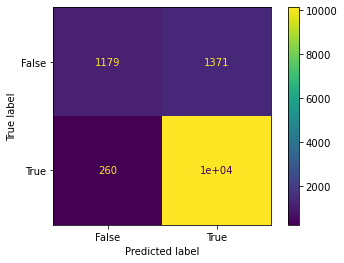

In [81]:
cm=confusion_matrix(y_test,pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

##### clustering

In [82]:
from sklearn.cluster import KMeans

In [83]:
df33=pd.DataFrame(polarity_list)

In [84]:
df33['overall']=df['rating']

In [85]:
df33

,0,overall
0,0.194255,5.0
1,0.251479,5.0
2,0.343074,5.0
3,0.453939,5.0
4,0.346841,4.0
...,...,...
64701,0.500000,4.0
64702,0.275000,5.0
64703,0.458333,5.0
64704,0.114074,3.0


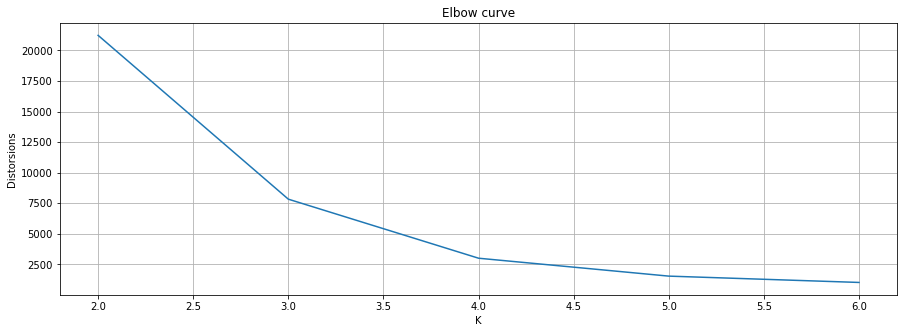

In [86]:
distorsions = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df33)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 7), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

For n_clusters = 2 The average silhouette_score is : 0.7202811939232893
For n_clusters = 3 The average silhouette_score is : 0.7495885740673727
For n_clusters = 4 The average silhouette_score is : 0.8173469594990257
For n_clusters = 5 The average silhouette_score is : 0.8408863124812186
For n_clusters = 6 The average silhouette_score is : 0.6842059418121413
For n_clusters = 7 The average silhouette_score is : 0.6645672937251785


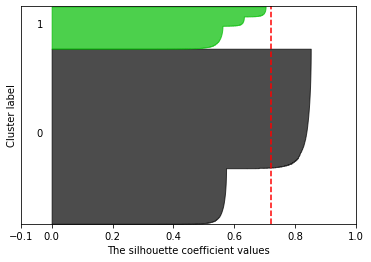

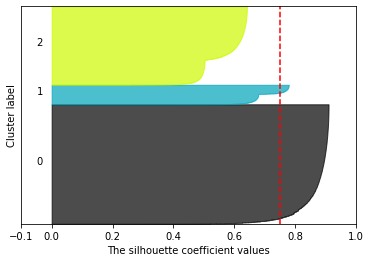

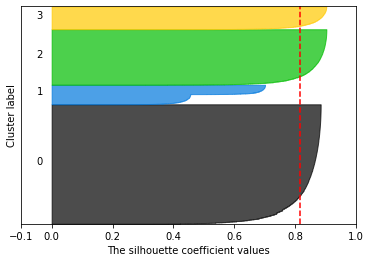

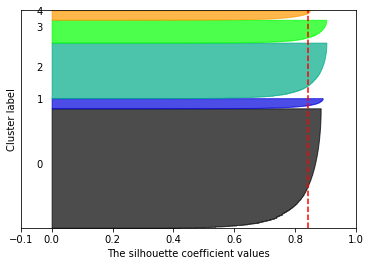

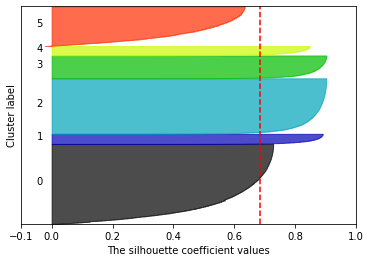

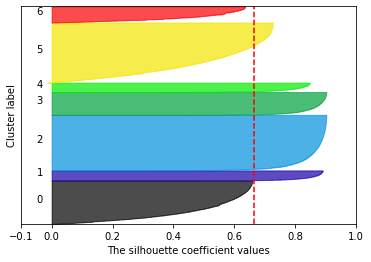

In [87]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df33)

    silhouette_avg = silhouette_score(df33, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df33, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [88]:
Kmeans_model = KMeans(n_clusters=5)
Kmeans_model.fit(df33)

KMeans(n_clusters=5)

In [89]:
cluster_centroid = Kmeans_model.cluster_centers_
cluster_centroid

array([[0.26556483, 5.        ],
       [0.11216289, 2.        ],
       [0.22530335, 4.        ],
       [0.1774306 , 3.        ],
       [0.01082537, 1.        ]])

In [90]:
labels = Kmeans_model.labels_
labels[:10]

array([0, 0, 0, 0, 2, 0, 3, 0, 0, 0])

In [91]:
pred=Kmeans_model.fit_predict(df33)
pred[:10]

array([1, 1, 1, 1, 0, 1, 3, 1, 1, 1])

In [92]:
x=df33.iloc[:,[0,1]].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


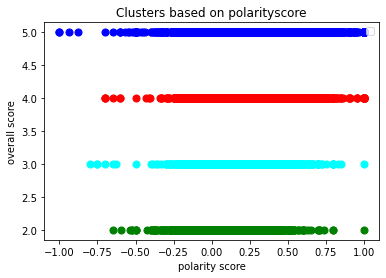

In [93]:
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 50, c = 'red')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 50, c = 'blue')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 50, c = 'green')
plt.scatter(x[pred == 3, 0], x[pred == 3, 1], s = 50, c = 'cyan')
plt.title('Clusters based on polarityscore')
plt.xlabel('polarity score')
plt.ylabel('overall score')
plt.legend()
plt.show()

#### Time Series

In [94]:
df2=pd.DataFrame(df['rating'])
df2

,rating
0,5.0
1,5.0
2,5.0
3,5.0
4,4.0
...,...
64701,4.0
64702,5.0
64703,5.0
64704,3.0


In [95]:
df2['reviewTime']=df['reviewTime']
df2

,rating,reviewTime
0,5.0,2006-09-12
1,5.0,2001-06-03
2,5.0,2003-07-14
3,5.0,2000-05-03
4,4.0,2008-01-17
...,...,...
64701,4.0,2014-06-24
64702,5.0,2014-07-09
64703,5.0,2014-07-13
64704,3.0,2014-07-09


In [96]:
df2=df2.groupby('reviewTime').sum()
df2

,rating
reviewTime,
1998-04-28,5.0
1998-05-12,10.0
1998-05-13,17.0
1998-05-15,2.0
1998-05-21,5.0
...,...
2014-07-18,5.0
2014-07-19,4.0
2014-07-21,18.0


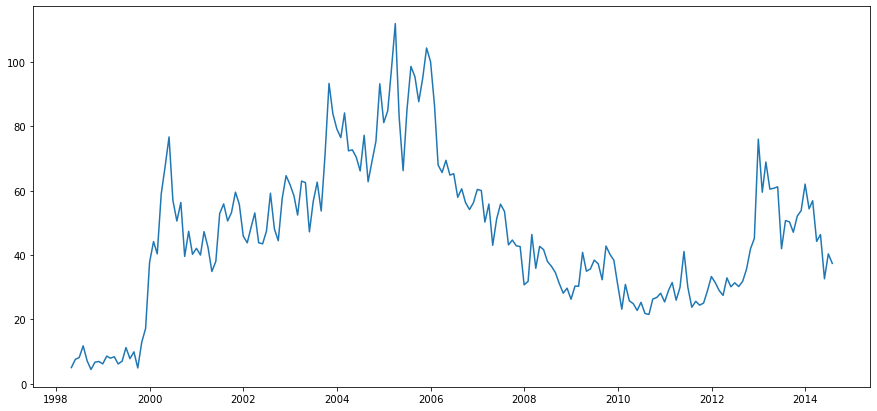

In [97]:
mon_resample=df2.resample('M')
new_df=pd.DataFrame(mon_resample.mean())
plt.figure(figsize=(15,7))

plt.plot(new_df)

In [98]:
#week_resample=df2.resample('W')
#new_df1=pd.DataFrame(week_resample.mean())
#plt.figure(figsize=(15,7))

#plt.plot(new_df)

In [99]:
len(new_df)

196

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [101]:
#decomp=seasonal_decompose(new_df,period=12)
decomp=seasonal_decompose(df2,period=12)

In [102]:
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

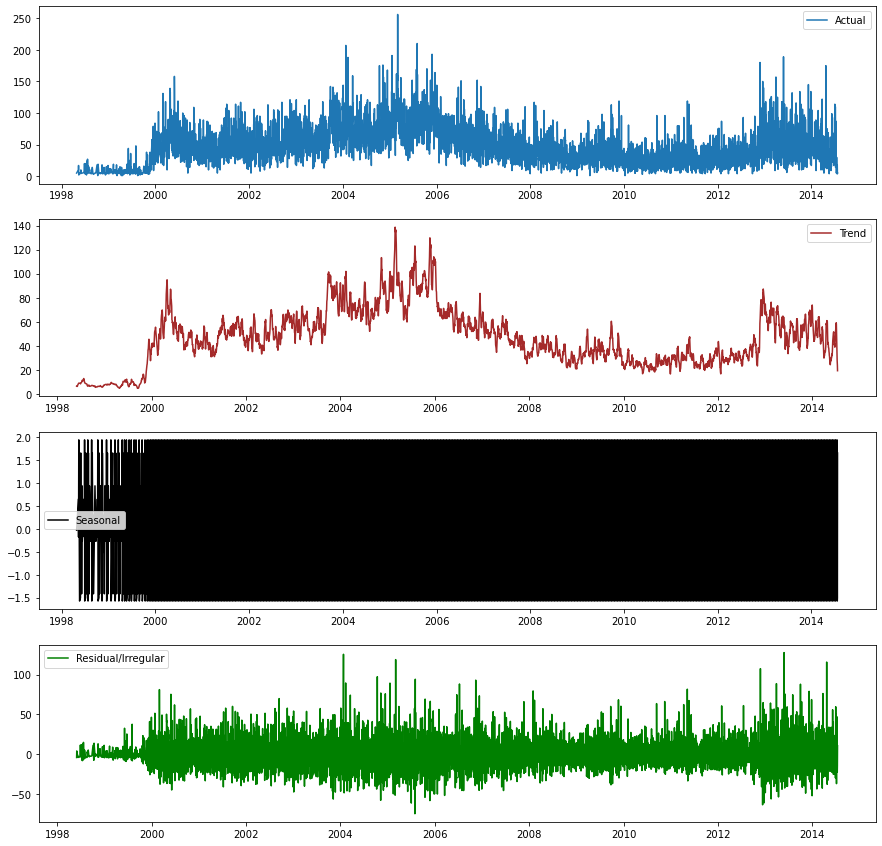

In [103]:
fig, ax = plt.subplots(4, 1, figsize = (15, 15)) # if we are not interested in naming variable of return value, then write _ # like x,y = plt(1,2) then if we dont care of return of 1, write _,y = plt(1,2)

# Actual Data
plt.subplot(411)
plt.plot(df2, label = 'Actual')
plt.legend()

# Trend
plt.subplot(412)
plt.plot(trend, label = 'Trend', color = 'brown')
plt.legend()

# Seasonal
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal', color = 'black')
plt.legend()

# Residual/Irregular
plt.subplot(414)
plt.plot(residual, label = 'Residual/Irregular', color = 'green')
plt.legend();

In [104]:
from statsmodels.tsa.api import ExponentialSmoothing
alpha=0.2;beta=0.5;gamma=0.8

In [105]:
model_tep=ExponentialSmoothing(df2,trend='add',seasonal='add',seasonal_periods=365).fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [106]:
fcast_tep=model_tep.fittedvalues
fcast_tep

reviewTime
1998-04-28     5.046079
1998-05-12     9.975138
1998-05-13    18.541376
1998-05-15     4.465523
1998-05-21     6.794878
                ...    
2014-07-18   -17.227573
2014-07-19   -30.938240
2014-07-21    26.729510
2014-07-22    25.589507
2014-07-23     9.593756
Length: 5611, dtype: float64

Text(0.5, 1.0, 'triple Exponent Smoothing')

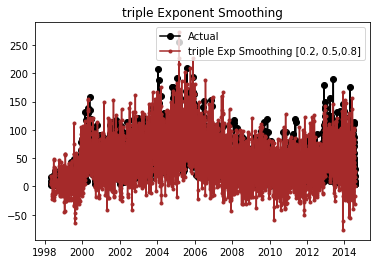

In [107]:
plt.plot(df2,marker='o',color='black',label='Actual')
plt.plot(fcast_tep, marker='.',color='brown',label='triple Exp Smoothing [0.2, 0.5,0.8]')
plt.legend()
plt.title('triple Exponent Smoothing')

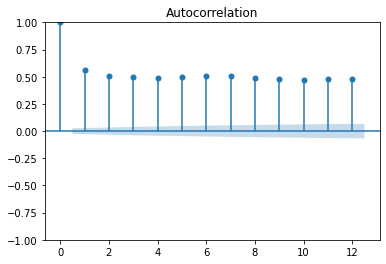

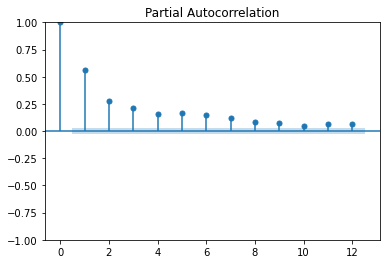

In [108]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(df2,lags=12)
plot_pacf(df2,lags=12)
plt.show()

In [109]:
p=9;q=12;d=1

In [110]:
train_len=int(0.7*len(df2))
train=df2.iloc[:train_len]
test=df2.iloc[train_len:]

In [111]:
print(len(train))
print(len(test))

3927
1684


In [112]:
import statsmodels
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(train,order=(p,1,q)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [113]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 rating   No. Observations:                 3927
Model:                ARIMA(9, 1, 12)   Log Likelihood              -17540.355
Date:                Thu, 08 Dec 2022   AIC                          35124.711
Time:                        12:39:26   BIC                          35262.769
Sample:                             0   HQIC                         35173.695
                               - 3927                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3857      0.506     -2.740      0.006      -2.377      -0.395
ar.L2         -1.1798      0.804     -1.468      0.142      -2.755       0.395
ar.L3         -0.6500      0.877     -0.741      0.459      -2.370       1.070
ar.L4         -0.7229      0.844     -0.856      0.392      -2.377       0.932
ar.L5         -0.8146      0.840     -0.970      0.332      -2.461       0.832
ar.L6         -0.6058      0.908     -0.667      0.505      -2.385       1.174
ar.L7          0.2244      0.807      0.278      0.781      -1.358       1.807
ar.L8          0.6684      0.513      1.303      0.193      -0.337       1.674
ar.L9          0.4039      0.210      1.922      0.055      -0.008       0.816
ma.L1          0.5839      0.507      1.151      0.250      -0.410       1.578
ma.L2         -0.0302      0.509     -0.059      0.953      -1.028       0.968
ma.L3         -0.4153      0.273     -1.522      0.128      -0.950       0.119
ma.L4          0.0776      0.191      0.405      0.685      -0.298       0.453
ma.L5          0.1445      0.196      0.738      0.460      -0.239       0.528
ma.L6         -0.1511      0.204     -0.740      0.459      -0.551       0.249
ma.L7         -0.7866      0.117     -6.722      0.000      -1.016      -0.557
ma.L8         -0.5630      0.371     -1.519      0.129      -1.289       0.163
ma.L9          0.1128      0.418      0.270      0.787      -0.706       0.932
ma.L10         0.3306      0.219      1.510      0.131      -0.099       0.760
ma.L11         0.0276      0.056      0.493      0.622      -0.082       0.138
ma.L12         0.0214      0.039      0.550      0.582      -0.055       0.097
sigma2       452.5935      7.574     59.757      0.000     437.749     467.438
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1097.77
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             0.75
Prob(H) (two-sided):                  0.49   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [114]:
p=np.arange(9)
q=np.arange(12)
li=[]
for p in range(10):
    for q in range(13):
        li.append((p,1,q))

In [115]:
model=[]

for i in li:
    m=ARIMA(train,order=i).fit()
    model.append(m)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\A

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\A

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [117]:
from sklearn.metrics import mean_squared_error

In [118]:
aic=[]
bic=[]
mse=[]
rmse=[]
for i in model:
    aic.append(i.aic)
    bic.append(i.bic)
    a=mean_squared_error(train,i.fittedvalues)
    b=mean_squared_error(train,i.fittedvalues,squared=False)
    mse.append(a)
    rmse.append(b)

In [119]:
print(min(aic))
print(min(bic))
print(min(mse))
print(min(rmse))

35111.925278662035
35190.648415856835
443.2349252497629
21.053145257888733


In [120]:
print(rmse.index(min(rmse)))

127


In [121]:
print(li[127])

(9, 1, 10)


In [122]:
p=9;q=10

In [123]:
model_arma=ARIMA(train,order=(p,1,q)).fit()

In [124]:
fcast_arma=model_arma.fittedvalues
fcast_arma

reviewTime
1998-04-28     0.000000
1998-05-12     4.998312
1998-05-13     7.822568
1998-05-15    11.336927
1998-05-21     7.518102
                ...    
2009-11-30    42.286724
2009-12-01    46.803488
2009-12-02    39.173708
2009-12-03    32.268398
2009-12-04    31.297524
Length: 3927, dtype: float64

In [125]:
model_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 rating   No. Observations:                 3927
Model:                ARIMA(9, 1, 10)   Log Likelihood              -17536.016
Date:                Thu, 08 Dec 2022   AIC                          35112.031
Time:                        12:58:12   BIC                          35237.539
Sample:                             0   HQIC                         35156.563
                               - 3927                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2603      0.293     -4.308      0.000      -1.834      -0.687
ar.L2         -1.1933      0.282     -4.235      0.000      -1.745      -0.641
ar.L3         -0.6651      0.204     -3.257      0.001      -1.065      -0.265
ar.L4         -0.6496      0.204     -3.185      0.001      -1.049      -0.250
ar.L5         -0.7222      0.206     -3.510      0.000      -1.126      -0.319
ar.L6         -0.5957      0.204     -2.914      0.004      -0.997      -0.195
ar.L7          0.2716      0.199      1.362      0.173      -0.119       0.662
ar.L8          0.6188      0.245      2.524      0.012       0.138       1.099
ar.L9          0.5018      0.163      3.070      0.002       0.181       0.822
ma.L1          0.4376      0.294      1.489      0.137      -0.139       1.014
ma.L2          0.0695      0.203      0.342      0.732      -0.328       0.467
ma.L3         -0.3850      0.156     -2.466      0.014      -0.691      -0.079
ma.L4          0.0112      0.087      0.129      0.897      -0.159       0.181
ma.L5          0.1197      0.086      1.400      0.162      -0.048       0.287
ma.L6         -0.0847      0.079     -1.077      0.282      -0.239       0.069
ma.L7         -0.8161      0.075    -10.896      0.000      -0.963      -0.669
ma.L8         -0.4595      0.260     -1.767      0.077      -0.969       0.050
ma.L9         -0.0102      0.167     -0.061      0.951      -0.337       0.317
ma.L10         0.3923      0.147      2.668      0.008       0.104       0.681
sigma2       452.1531      7.549     59.894      0.000     437.357     466.949
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):              1110.57
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             0.75
Prob(H) (two-sided):                  0.68   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
predictions=model_arma.predict(start=len(train),end=len(train)+len(test)-1)

In [127]:
predictions

3927    30.681048
3928    34.582956
3929    40.787780
3930    44.277151
3931    39.751124
          ...    
5606    36.654462
5607    37.443457
5608    38.666112
5609    39.401007
5610    39.095592
Name: predicted_mean, Length: 1684, dtype: float64

In [128]:
fcast=model_arma.predict(start=len(df2),end=len(df2)+10)
print(fcast)

5611    37.981633
5612    36.899341
5613    36.663644
5614    37.450573
5615    38.665807
5616    39.393524
5617    39.086578
5618    37.977878
5619    36.903664
5620    36.672776
5621    37.457629
Name: predicted_mean, dtype: float64


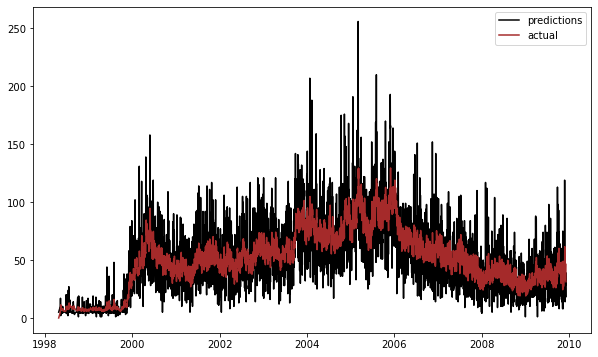

In [129]:
plt.figure(figsize=(10,6))
plt.plot(train,'black',label='predictions')
plt.plot(fcast_arma,'brown',label='actual')
plt.legend()

In [163]:
p=1;q=1;d=2
import statsmodels.api as sm
model_sarima=sm.tsa.statespace.SARIMAX(new_df,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()

In [164]:
fcast_sarima=model_sarima.fittedvalues
fcast_sarima

reviewTime
1998-04-30     0.000000
1998-05-31     8.749641
1998-06-30    10.143147
1998-07-31     8.651294
1998-08-31    15.388023
                ...    
2014-03-31    51.540047
2014-04-30    48.615389
2014-05-31    45.484895
2014-06-30    24.540207
2014-07-31    42.945191
Freq: M, Length: 196, dtype: float64

In [165]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             rating   No. Observations:                  196
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 12)   Log Likelihood                -658.124
Date:                            Thu, 08 Dec 2022   AIC                           1326.248
Time:                                    21:19:47   BIC                           1341.927
Sample:                                04-30-1998   HQIC                          1332.611
                                     - 07-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1093      0.079     -1.375      0.169      -0.265       0.047
ma.L1         -0.9998      7.327     -0.136      0.891     -15.361      13.361
ar.S.L12      -0.5372      0.061     -8.736      0.000      -0.658      -0.417
ma.S.L12      -1.0000   2050.540     -0.000      1.000   -4019.985    4017.985
sigma2        97.3382   1.99e+05      0.000      1.000   -3.91e+05    3.91e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                13.23
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.28
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [166]:
fcast_sarima1 = model_sarima.forecast(len(test))

In [167]:
fcast_sarima1

2014-08-31        39.665149
2014-09-30        40.877170
2014-10-31        47.224722
2014-11-30        50.272043
2014-12-31        72.190163
                  ...      
2154-07-31    246172.791075
2154-08-31    246650.575349
2154-09-30    247122.566815
2154-10-31    247586.476497
2154-11-30    248040.801554
Freq: M, Name: predicted_mean, Length: 1684, dtype: float64

In [168]:
fcast_sarima1[:20]

2014-08-31    39.665149
2014-09-30    40.877170
2014-10-31    47.224722
2014-11-30    50.272043
2014-12-31    72.190163
2015-01-31    58.672395
2015-02-28    66.063680
2015-03-31    54.248917
2015-04-30    55.798816
2015-05-31    49.106980
2015-06-30    42.505631
2015-07-31    46.338597
2015-08-31    48.046893
2015-09-30    47.703689
2015-10-31    54.013189
2015-11-30    56.922784
2015-12-31    73.064579
2016-01-31    61.653983
2016-02-29    67.676096
2016-03-31    54.035135
Freq: M, Name: predicted_mean, dtype: float64

In [169]:
fcast_sarima1[:80]

2014-08-31     39.665149
2014-09-30     40.877170
2014-10-31     47.224722
2014-11-30     50.272043
2014-12-31     72.190163
                 ...    
2020-11-30    131.033365
2020-12-31    155.406454
2021-01-31    140.316142
2021-02-28    151.903784
2021-03-31    134.777898
Freq: M, Name: predicted_mean, Length: 80, dtype: float64

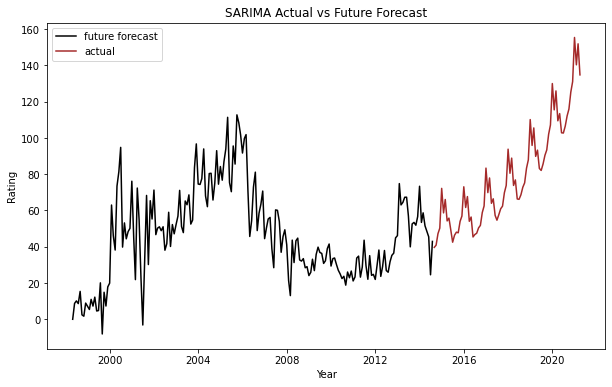

In [170]:
plt.figure(figsize=(10,6))
plt.plot(fcast_sarima,'black',label='future forecast')
plt.plot(fcast_sarima1[:80],'brown',label='actual')
plt.title("SARIMA Actual vs Future Forecast")
plt.xlabel("Year")
plt.ylabel("Rating")
plt.legend()

In [171]:
aic=[]
bic=[]
mse=[]
rmse=[]
for i in model:
    aic.append(i.aic)
    bic.append(i.bic)
    a=mean_squared_error(train,i.fittedvalues)
    b=mean_squared_error(train,i.fittedvalues,squared=False)
    mse.append(a)
    rmse.append(b)

In [172]:
print(min(aic))
print(min(bic))
print(min(mse))
print(min(rmse))

35111.925278662035
35190.648415856835
443.2349252497629
21.053145257888733
